<a href="https://colab.research.google.com/github/SergioOliveirasci/sergiooliveira_mvp2025-1/blob/main/S%C3%A9rgio_Oliveira_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Sérgio Oliveira

**Matrícula:** 4052025000702

**Dataset:** [Kaglle Dataset](https://www.kaggle.com/datasets/aadyasingh55/drug-dataset/data)

**---OBSERVAÇÕES IMPORTANTES---**

Este projeto refere-se a MVP da disciplina de Análise Exploratória e Pré-Processamento de Dados. A diante, serão abordados dados extraidos do dataset "Conjunto de dados sobre medicamentos: usos, efeitos colaterais e avaliações de usuários." e serão aboardados técnicas observadas nas aulas.




# Descrição do Problema

Em um cenário onde pacientes, médicos e farmacêuticos precisam tomar decisões informadas sobre o uso de medicamentos, a análise de grandes bancos de dados contendo informações sobre **composição, eficácia e efeitos adversos** torna-se extremamente valiosa.

Este projeto tem como objetivo explorar um dataset com mais de 11 mil medicamentos, extraindo informações relevantes que podem:

- Ajudar profissionais de saúde a entender melhor a composição e os usos dos remédios.
- Identificar os medicamentos com maior aceitação e avaliação positiva por parte dos usuários.
- Observar padrões de efeitos colaterais, fabricantes mais ativos e categorias terapêuticas mais comuns.


## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Medicamentos com múltiplos princípios ativos têm avaliações piores do que os com princípio único?

- Fabricantes mais frequentes na base têm melhores médias de avaliação?

- Medicamentos indicados para doenças crônicas tendem a ter avaliações mais negativas que os indicados para doenças agudas?

- Medicamentos com maior número de efeitos colaterais listados têm pior avaliação?

## Tipo de Problema

Este é um problema é aplicável para aprendizados supervisionados, pois contém um rótulo (Rating), que pode ser previsível a partir de outras features. Isso permite:

- Classificação (ex: prever se um medicamento terá avaliação boa ou ruim)

- Regressão (ex: estimar a nota média)

Mas também pode ser aplicado a aprendizados não supervisionados.

Também há possibilidade de clusterizar medicamentos por composição, efeitos colaterais, ou tópicos extraídos das avaliações textuais.

Portanto, o dataset suporta ambos os tipos de tarefas, mas seu ponto forte é supervisionado, porque já existe um target definido (Rating).

## Seleção de Dados

O dataset "Conjunto de dados sobre medicamentos: usos, efeitos colaterais e avaliações de usuários" da Kaglle é um conjunto de dados amplamente disponível e frequentemente incluído em bibliotecas de aprendizado de máquina.
Nesse projeto estamos utilizando ele através do link hospedado dentro de um repositório público do GitHub para proteger as informações e dados caso sofram alguma alteração dentro da plataforma do Kaglle.

## Atributos do Dataset

O dataset contém **11.825 medicamentos**, cada um descrito por diversas variáveis:

- **Medicine Name**: nome comercial do medicamento.
- **Composition**: os princípios ativos e suas respectivas concentrações.
- **Uses**: indicações terapêuticas principais.
- **Side_effects**: efeitos colaterais reportados.
- **Image URL**: link para uma imagem do medicamento.
- **Manufacturer**: empresa responsável pela produção.
- **Excellent Review %**: percentual de avaliações excelentes dos usuários.
- **Average Review %**: percentual de avaliações médias.
- **Poor Review %**: percentual de avaliações negativas.


# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# carregamento do dataset (aqui, ele fica disponível nesse método)
dataset_url = 'https://raw.githubusercontent.com/SergioOliveirasci/sergiooliveira_mvp2025-1/refs/heads/main/Medicine_Details.csv'

In [ ]:
# guardo o dataset em um dataframe
df = pd.read_csv (dataset_url)

In [ ]:
# primeiras linhas
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


# Traduzindo as colunas

In [ ]:
df = df.rename(columns={
    'Medicine Name': 'Nome_do_Medicamento',
    'Composition': 'Composicao',
    'Uses': 'Usos',
    'Side_effects': 'Efeitos_Colaterais',
    'Image URL': 'URL_Imagem',
    'Manufacturer': 'Fabricante',
    'Excellent Review %': 'Percentual de avaliações Excelente',
    'Average Review %': 'Percentual de avaliações Média',
    'Poor Review %': 'Percentual de avaliações Ruim'
})
df.head()

,Nome_do_Medicamento,Composicao,Usos,Efeitos_Colaterais,URL_Imagem,Fabricante,Percentual de avaliações Excelente,Percentual de avaliações Média,Percentual de avaliações Ruim
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset "Conjunto de dados sobre medicamentos: usos, efeitos colaterais e avaliações de usuários", visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset contém 11.825 instâncias (linhas), com 9 atributos (colunas). As características de medição são de tipo texto (object) e números inteiros (int).

Os principais atributos são:

Medicine Name → nome_medicamento

Composition → composicao

Uses → usos

Side_effects → efeitos_colaterais

Manufacturer → fabricante

Excellent Review % → Percentual de avaliação Excelente

Average Review % → Percentual de avaliação Médio

Poor Review % → Percentual de avaliação Ruim

In [ ]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 11825

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Nome_do_Medicamento                 11825 non-null  object
 1   Composicao                          11825 non-null  object
 2   Usos                                11825 non-null  object
 3   Efeitos_Colaterais                  11825 non-null  object
 4   URL_Imagem                          11825 non-null  object
 5   Fabricante                          11825 non-null  object
 6   Percentual de avaliações Excelente  11825 non-null  int64 
 7   Percentual de avaliações Média      11825 non-null  int64 
 8   Percentual de avaliações Ruim       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB
None


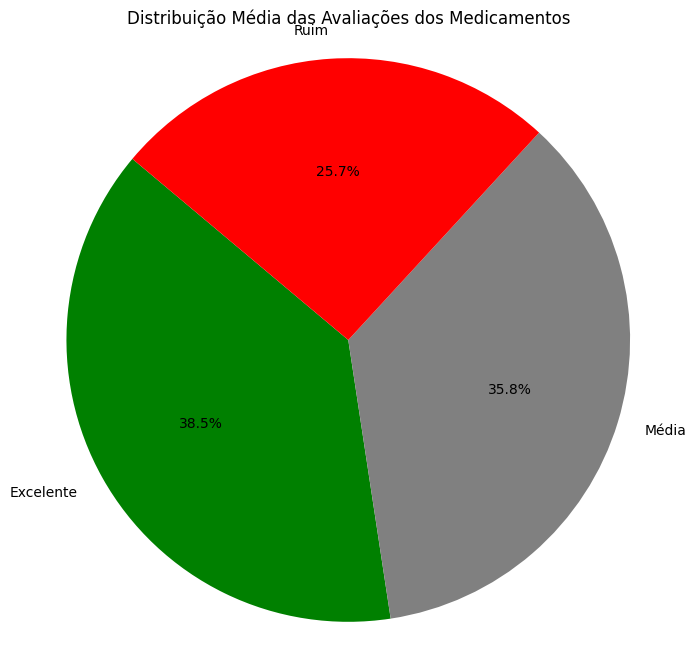

In [ ]:
# Calcular médias dos percentuais de avaliação
media_excelente = df['Percentual de avaliações Excelente'].mean()
media_media = df['Percentual de avaliações Média'].mean()
media_ruim = df['Percentual de avaliações Ruim'].mean()

# Dados para o gráfico de pizza
labels = ['Excelente', 'Média', 'Ruim']
valores = [media_excelente, media_media, media_ruim]
cores = ['green', 'gray', 'red']

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, colors=cores, autopct='%.1f%%', startangle=140)
plt.title('Distribuição Média das Avaliações dos Medicamentos')
plt.axis('equal')  # Deixa a pizza circular
plt.show()

Este gráfico de pizza representa a distribuição média percentual das avaliações dos medicamentos da base de dados, nas categorias:

- Excelente	38,5%	A maior parte dos medicamentos recebe avaliações positivas — indicando boa eficácia percebida ou boa aceitação.
- Média	35,8%	Um terço das avaliações indicam uma percepção neutra ou regular dos medicamentos.
- Ruim	25,7%	Quase 1 em cada 4 avaliações é negativa — sinalizando que há medicamentos com problemas de eficácia, efeitos adversos ou insatisfação do paciente.

 O que podemos concluir com base no dataset:
A maioria dos medicamentos é bem avaliada, com quase 40% de avaliações excelentes em média.

Há um equilíbrio significativo entre avaliações excelentes e médias, o que mostra que o público nem sempre tem uma opinião fortemente positiva ou negativa.

O percentual de avaliações ruins não é desprezível (25,7%), o que exige atenção — principalmente para identificar medicamentos com índices negativos muito altos.

Como esse gráfico pode ser útil:
Comunicação clara da percepção geral dos usuários/pacientes.

Ajuda a justificar decisões de investigação sobre medicamentos com avaliações negativas.

É excelente para resumo executivo ou apresentação pública dos dados.



## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [ ]:
# estatísticas descritivas básicas do dataset
df.describe() .round(1)

,Percentual de avaliações Excelente,Percentual de avaliações Média,Percentual de avaliações Ruim
count,11825.0,11825.0,11825.0
mean,38.5,35.8,25.7
std,25.2,18.3,24.0
min,0.0,0.0,0.0
25%,22.0,27.0,0.0
50%,34.0,35.0,22.0
75%,51.0,47.0,35.0
max,100.0,88.0,100.0


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [ ]:
# média dos atributos numéricos do dataset
df.describe().loc['mean'] .round(2)

,mean
Percentual de avaliações Excelente,38.52
Percentual de avaliações Média,35.76
Percentual de avaliações Ruim,25.73


In [ ]:
# Sobre as possibilidades de  O gráfico de barras seria interessante usar pra mostrar o percentual da média de avaliações de medicamentos.

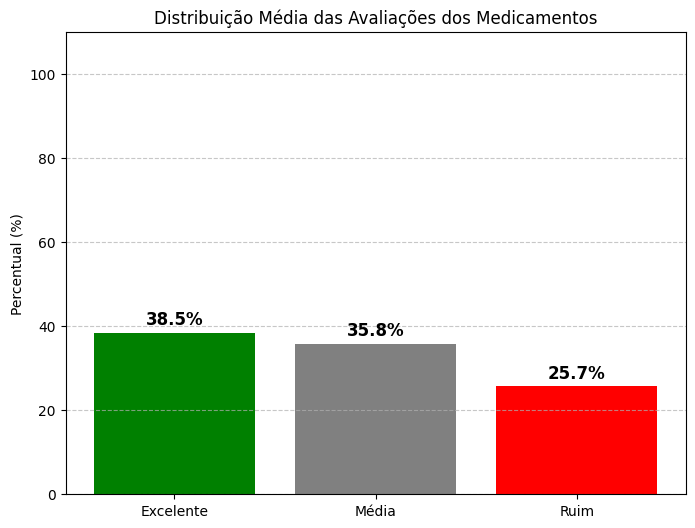

In [ ]:
# Calcular médias dos percentuais de avaliação
media_excelente = df['Percentual de avaliações Excelente'].mean()
media_media = df['Percentual de avaliações Média'].mean()
media_ruim = df['Percentual de avaliações Ruim'].mean()

# Dados para o gráfico de barras
labels = ['Excelente', 'Média', 'Ruim']
valores = [media_excelente, media_media, media_ruim]
cores = ['green', 'gray', 'red']

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
barras = plt.bar(labels, valores, color=cores)

# Adicionar rótulos de valor acima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 1,
             f'{altura:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Personalização
plt.title('Distribuição Média das Avaliações dos Medicamentos')
plt.ylabel('Percentual (%)')
plt.ylim(0, 110)  # Ajuste para dar espaço aos rótulos
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Esse gráfico de barras mostra a distribuição média dos percentuais de avaliação dos medicamentos na base de dados.

O que o gráfico nos mostra

- Excelente	38,5%	A maior parte dos medicamentos, em média, recebeu avaliações muito positivas.
- Média	35,8%	Um número significativo de avaliações ficou na faixa intermediária, indicando neutralidade ou satisfação moderada.
- Ruim	25,7%	Uma parte considerável dos medicamentos foi mal avaliada por usuários — cerca de 1 em cada 4 avaliações é negativa.

Análises e conclusões possíveis
Boa aceitação geral dos medicamentos:

O fato de que quase 40% das avaliações são excelentes sugere que muitos medicamentos têm eficácia percebida e boa experiência do usuário.

Alerta com avaliações ruins:

Mais de 25% das avaliações são ruins, o que não pode ser ignorado. Indica que há medicamentos com performance insatisfatória, efeitos adversos ou problemas de expectativa.

Polarização:

A soma dos extremos (excelente + ruim = 64%) mostra que os usuários tendem a ter opiniões fortes — ou amam ou odeiam. Poucos permanecem neutros.

Necessidade de segmentar os dados:

Essa média oculta diferenças entre fabricantes, tipos de uso ou princípios ativos. Seria útil:

Investigar quais medicamentos têm mais avaliações ruins.

Analisar por tipo de tratamento (ex: antibióticos, analgésicos etc.).

Ver quem são os fabricantes com pior desempenho médio.

Esse gráfico pode ser útil em relatórios executivos, mostra um retrato geral da satisfação com os produtos.
Em decisões estratégicas de farmacovigilância: pode orientar revisões, reformulações ou auditorias.
Em marketing e comunicação, pode ajudar a valorizar os produtos bem avaliados.

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [ ]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std'] .round(2)

,std
Percentual de avaliações Excelente,25.23
Percentual de avaliações Média,18.27
Percentual de avaliações Ruim,23.99


In [ ]:
# Qual gráfico seria interessante usar pra mostrar o desvio padrão?

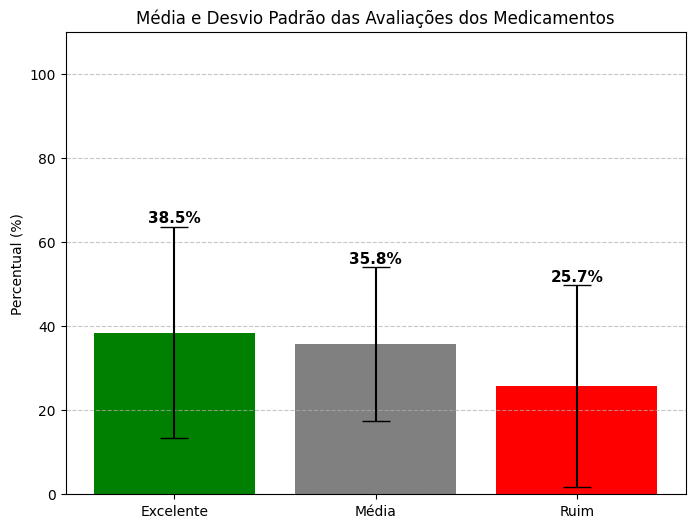

In [ ]:
# Calcular média e desvio padrão para cada tipo de avaliação
medias = [
    df['Percentual de avaliações Excelente'].mean(),
    df['Percentual de avaliações Média'].mean(),
    df['Percentual de avaliações Ruim'].mean()
]

desvios = [
    df['Percentual de avaliações Excelente'].std(),
    df['Percentual de avaliações Média'].std(),
    df['Percentual de avaliações Ruim'].std()
]

# Dados para o gráfico
labels = ['Excelente', 'Média', 'Ruim']
cores = ['green', 'gray', 'red']

# Criar gráfico de barras com barras de erro (desvio padrão)
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, yerr=desvios, capsize=10, color=cores)

# Adicionar rótulos nas barras
for i, valor in enumerate(medias):
    plt.text(i, valor + desvios[i] + 1, f'{valor:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Personalização
plt.title('Média e Desvio Padrão das Avaliações dos Medicamentos')
plt.ylabel('Percentual (%)')
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O que o gráfico mostra (interpretação do gráfico com desvio padrão):

Tipo de Avaliação	Média (%)	Desvio Padrão (observado)	Interpretação

- Excelente	38,5%	Alto (~25%)	A média é relativamente alta, mas há muita variação entre medicamentos. Alguns são muito bem avaliados, outros não.
- Média	35,8%	Moderado (~18%)	Avaliações médias são consistentes, mas ainda com dispersão considerável.
- Ruim	25,7%	Alto (~25%)	A média é menor, mas também com alta variabilidade — alguns medicamentos têm taxas muito altas de avaliação ruim.

Por que esse estilo de gráfico (barras com erro padrão) é adequado?
Porque ele:
- Mostra a média (altura da barra) de forma clara.

- Mostra a incerteza ou variabilidade (linha preta = desvio padrão).

- Permite comparar não só os valores centrais, mas também a consistência dos dados.

- É ideal quando se tem resumos estatísticos em vez de dados individuais — como neste caso.

Quando esse gráfico é o mais recomendado:

- Quando você quer comunicar médias e confiabilidade (dispersão).

- Em apresentações científicas, pois ele mostra que você está considerando a variabilidade dos dados.

- Quando as diferenças entre grupos podem ser afetadas pela dispersão.


Insights que você pode usar em relatório ou apresentação:
- A alta dispersão nas avaliações excelentes e ruins indica polarização nas opiniões dos usuários.

- A categoria “média” tem menos variabilidade, sugerindo mais consenso entre os avaliadores.

- Seria interessante investigar quais medicamentos apresentam extremos de avaliação excelente ou ruim, pois podem ser outliers positivos ou problemas críticos.



## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Percentual de Avaliações Excelentes*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

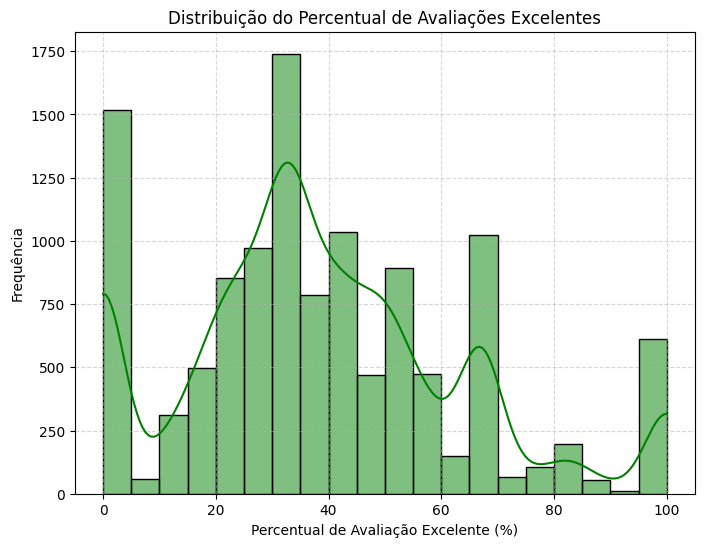

In [ ]:
# Criar histograma da coluna "Percentual de avaliações Excelente"
plt.figure(figsize=(8, 6))
sns.histplot(df['Percentual de avaliações Excelente'], kde=True, color='green', bins=20)
plt.title('Distribuição do Percentual de Avaliações Excelentes')
plt.xlabel('Percentual de Avaliação Excelente (%)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

*Sobre o gráfico acima*

 O que esse gráfico nos mostra:

Alta frequência em avaliações muito baixas (0%):

O primeiro pico à esquerda mostra que muitos medicamentos têm 0% de avaliações excelentes.

Isso pode indicar medicamentos pouco eficazes, mal avaliados, ou pouco conhecidos (baixo volume de avaliações).

Pico em torno de 30–40%:

O maior número de medicamentos tem entre 30% e 40% de avaliações excelentes, o que reflete a média geral já vista anteriormente (~38,5%).

Distribuição multimodal:

Há múltiplos picos: um em 0%, outro entre 30–40%, outro perto de 60–70% e até um no extremo (100%).

- Isso sugere que existem grupos distintos de medicamentos com diferentes níveis de aceitação:

Alguns são mal avaliados,

Outros têm desempenho razoável,

Alguns são muito bem avaliados.

- Distribuição assimétrica à direita:

Há menos medicamentos com alta porcentagem de avaliações excelentes (acima de 70%),

Mas o número não é insignificante, o que mostra que há casos de alta performance percebida.

- O que podemos concluir com esse histograma:
O dataset tem variação significativa na percepção de qualidade dos medicamentos.

A média (~38,5%) pode ser enganosa sozinha, já que muitos medicamentos têm desempenho muito abaixo ou muito acima disso.

Existe um grupo de medicamentos muito mal avaliados (0–10%), que pode ser interessante investigar mais de perto.

Por outro lado, há medicamentos campeões de avaliação, com 100% de avaliações excelentes — valeria destacar esses também.

- Como esse gráfico pode ser útil:
Para segmentar medicamentos por desempenho percebido (ex: ruim, regular, excelente).

Para identificar extremos (outliers), como os piores e os melhores medicamentos.

Para comunicar visualmente a variabilidade na percepção dos produtos.

### *Utilizando o Histograma para cruzamento de variáveis*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

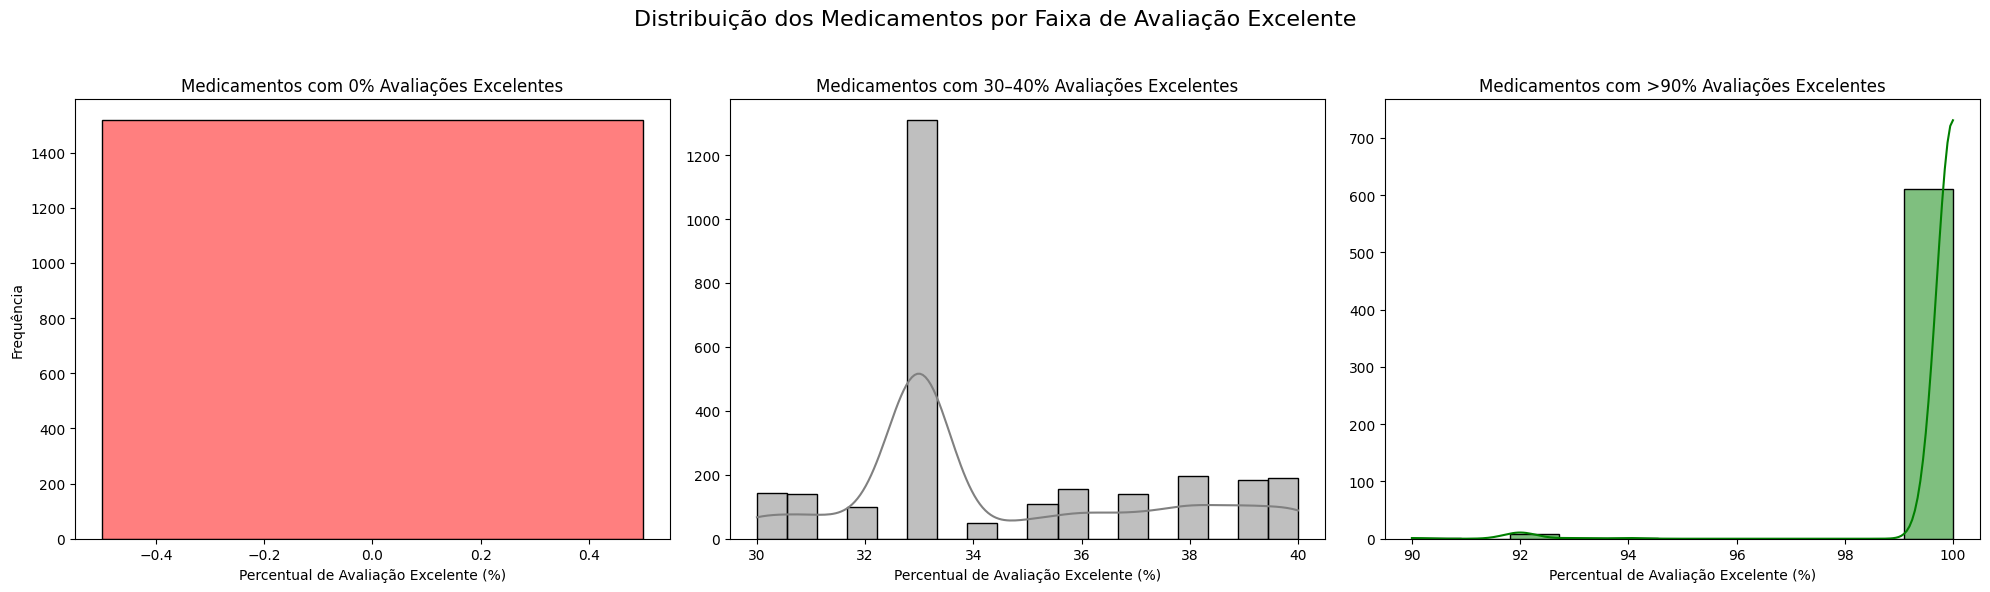

In [ ]:
# Filtra os grupos de medicamentos
piores = df[df['Percentual de avaliações Excelente'] == 0]
regulares = df[(df['Percentual de avaliações Excelente'] >= 30) & (df['Percentual de avaliações Excelente'] <= 40)]
melhores = df[df['Percentual de avaliações Excelente'] >= 90]

# Cria os três histogramas lado a lado
plt.figure(figsize=(20, 6))

# Medicamentos com 0% avaliação excelente
plt.subplot(1, 3, 1)
sns.histplot(piores['Percentual de avaliações Excelente'], kde=True, color='red')
plt.title('Medicamentos com 0% Avaliações Excelentes')
plt.xlabel('Percentual de Avaliação Excelente (%)')
plt.ylabel('Frequência')

# Medicamentos com 30–40% avaliação excelente
plt.subplot(1, 3, 2)
sns.histplot(regulares['Percentual de avaliações Excelente'], kde=True, color='gray')
plt.title('Medicamentos com 30–40% Avaliações Excelentes')
plt.xlabel('Percentual de Avaliação Excelente (%)')
plt.ylabel('')

# Medicamentos com >90% avaliação excelente
plt.subplot(1, 3, 3)
sns.histplot(melhores['Percentual de avaliações Excelente'], kde=True, color='green')
plt.title('Medicamentos com >90% Avaliações Excelentes')
plt.xlabel('Percentual de Avaliação Excelente (%)')
plt.ylabel('')

# Ajustes finais
plt.suptitle('Distribuição dos Medicamentos por Faixa de Avaliação Excelente', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

O que cada gráfico representa
1. Medicamentos com 0% de avaliações excelentes
Há um grande número de medicamentos nessa categoria.

Isso indica que uma parcela significativa dos produtos não recebeu nenhuma avaliação considerada excelente, o que pode refletir problemas de eficácia, efeitos colaterais, ou baixa aceitação.

2. Medicamentos com 30–40% de avaliações excelentes
Essa é a faixa mais comum (corresponde à média geral do dataset).

A distribuição é mais equilibrada, mostrando que muitos medicamentos são considerados "bons", mas não ótimos.

3. Medicamentos com >90% de avaliações excelentes
Poucos medicamentos atingem essa categoria.

São os mais bem avaliados, provavelmente com alta eficácia percebida e baixa ocorrência de efeitos adversos.

O que podemos concluir
A polarização entre medicamentos muito bem e muito mal avaliados é clara.

Embora a média geral esteja próxima de 38%, a presença de grupos extremos (0% e >90%) sugere uma diversidade grande na qualidade percebida dos produtos.

Esses gráficos ajudam a identificar os grupos de interesse para estudo mais profundo — como os produtos com 0% (podem estar com problemas) ou >90% (bons candidatos para benchmarking ou recomendação).

## Boxplot

Para entender as diferenças entre os medicamentos, devemos observar como se comportam os valores do percentual de avaliações ruins quando agrupados por uma variável categórica, como o fabricante. Isso nos permite comparar a mediana, dispersão, presença de outliers e o comportamento geral dessa avaliação em cada grupo, utilizando o boxplot como ferramenta visual.

In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('Percentual de avaliações Ruim').describe() .round(2)

Percentual de avaliações Excelente         \
                                                           count   mean   
Percentual de avaliações Ruim                                             
0                                                         3094.0  65.90   
2                                                            2.0  43.00   
3                                                            6.0  51.33   
4                                                           19.0  52.11   
5                                                           25.0  53.00   
...                                                          ...    ...   
83                                                          85.0   0.00   
87                                                           1.0   0.00   
89                                                          17.0   0.00   
92                                                           3.0   0.00   
100                                                        389.0   0.00   

                                                                       \
                                 std   min    25%   50%    75%    max   
Percentual de avaliações Ruim                                           
0                              22.90  12.0  50.00  67.0  83.00  100.0   
2                               1.41  42.0  42.50  43.0  43.50   44.0   
3                               6.19  42.0  48.25  52.5  53.75   60.0   
4                              11.73  31.0  44.00  53.0  61.00   73.0   
5                              10.86  36.0  46.00  51.0  59.00   79.0   
...                              ...   ...    ...   ...    ...    ...   
83                              0.00   0.0   0.00   0.0   0.00    0.0   
87                               NaN   0.0   0.00   0.0   0.00    0.0   
89                              0.00   0.0   0.00   0.0   0.00    0.0   
92                              0.00   0.0   0.00   0.0   0.00    0.0   
100                             0.00   0.0   0.00   0.0   0.00    0.0   

                              Percentual de avaliações Média                \
                                                       count   mean    std   
Percentual de avaliações Ruim                                                
0                                                     3094.0  34.10  22.90   
2                                                        2.0  55.00   1.41   
3                                                        6.0  45.67   6.19   
4                                                       19.0  43.89  11.73   
5                                                       25.0  42.00  10.86   
...                                                      ...    ...    ...   
83                                                      85.0  17.00   0.00   
87                                                       1.0  13.00    NaN   
89                                                      17.0  11.00   0.00   
92                                                       3.0   8.00   0.00   
100                                                    389.0   0.00   0.00   

                                                               
                                min    25%   50%    75%   max  
Percentual de avaliações Ruim                                  
0                               0.0  17.00  33.0  50.00  88.0  
2                              54.0  54.50  55.0  55.50  56.0  
3                              37.0  43.25  44.5  48.75  55.0  
4                              23.0  35.00  43.0  52.00  65.0  
5                              16.0  36.00  44.0  49.00  59.0  
...                             ...    ...   ...    ...   ...  
83                             17.0  17.00  17.0  17.00  17.0  
87                             13.0  13.00  13.0  13.00  13.0  
89                             11.0  11.00  11.0  11.00  11.0  
92                              8.0   8.00   8.0   8.00   8.0  
100                            

### *Aplicações do gráfico Bloxplot em alguns atributos.*


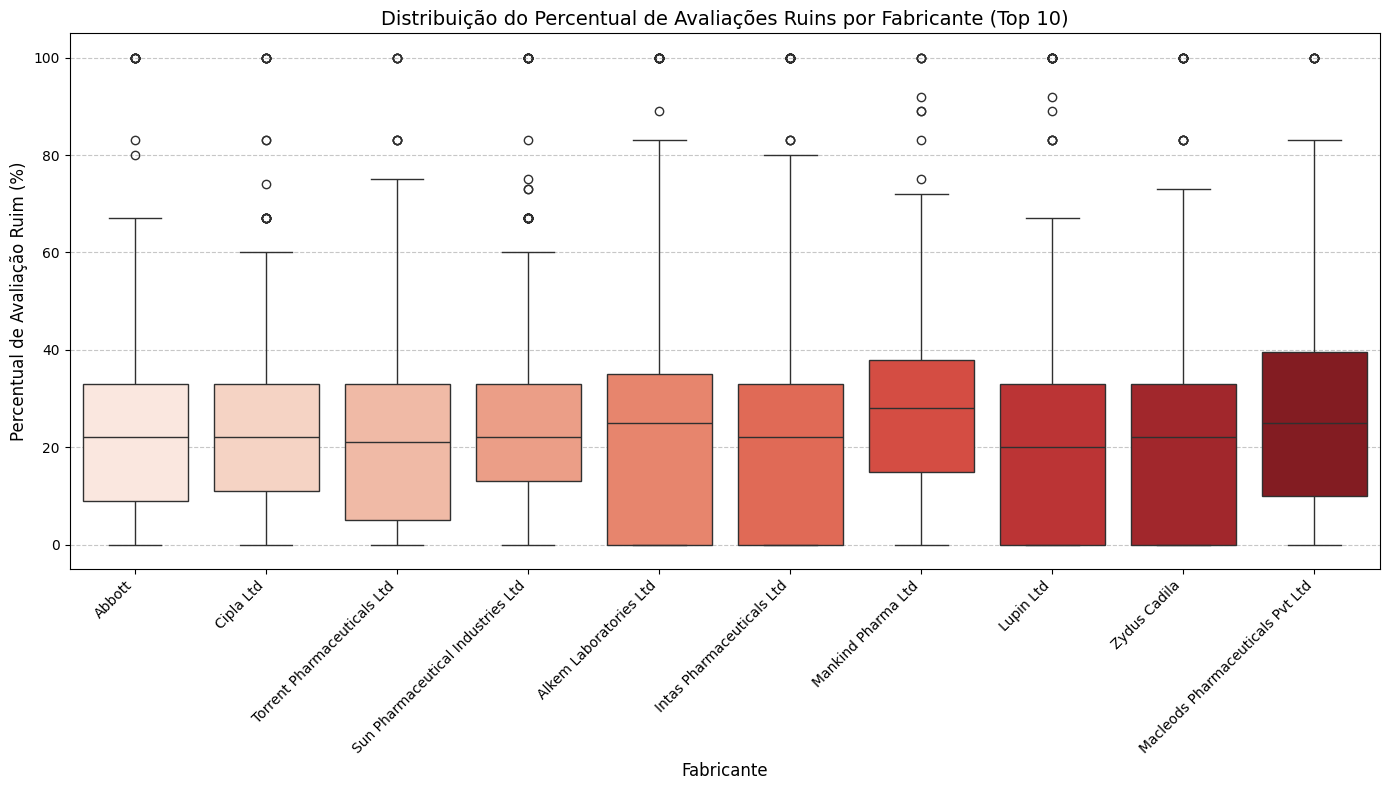

In [ ]:
# Selecionar os 10 fabricantes mais frequentes
fabricantes_top = df['Fabricante'].value_counts().nlargest(10).index

# Filtrar o DataFrame com apenas os 10 principais fabricantes
df_top = df[df['Fabricante'].isin(fabricantes_top)]

# Criar o boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top,
            x='Fabricante',
            y='Percentual de avaliações Ruim',
            hue='Fabricante',
            palette='Reds',
            legend=False)

# Personalização do gráfico
plt.title('Distribuição do Percentual de Avaliações Ruins por Fabricante (Top 10)', fontsize=14)
plt.xlabel('Fabricante', fontsize=12)
plt.ylabel('Percentual de Avaliação Ruim (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibir o gráfico
plt.show()

O boxplot apresentado nos permite fazer uma série de análises relevantes sobre os percentuais de avaliações ruins por fabricante no seu dataset. Vamos a elas:

1. Distribuição das avaliações ruins
Cada caixa no gráfico representa a distribuição dos percentuais de avaliações ruins dos medicamentos de um determinado fabricante:

A linha dentro da caixa é a mediana (valor central).

A altura da caixa mostra o intervalo entre o 1º e o 3º quartil (50% dos dados).

As linhas verticais (bigodes) mostram a dispersão fora desse intervalo.

Os pontos acima ou abaixo são outliers — medicamentos com avaliação muito diferente da maioria.

2. Principais observações
- Consistência entre fabricantes:
Fabricantes como Cipla Ltd, Sun Pharmaceutical Industries Ltd e Abbott têm distribuições mais concentradas, indicando maior consistência entre seus medicamentos.

Outros como Macleods Pharmaceuticals Pvt Ltd e Mankind Pharma Ltd apresentam maior variação, o que pode indicar medicamentos com desempenho muito diferente entre si.

- Outliers importantes:
A presença de vários outliers acima de 80% sugere que alguns medicamentos dessas empresas foram muito mal avaliados.

Isso pode indicar produtos problemáticos ou mal adaptados ao público.

- Mediana elevada:
Algumas fabricantes têm medianas acima de 25%, o que significa que metade dos seus medicamentos têm avaliações ruins relevantes.

O que podemos concluir
O gráfico não aponta uma fabricante "ruim" ou "boa" isoladamente, mas mostra quem tem maior variabilidade, quem tem outliers frequentes, e quem mantém um padrão mais estável.

Empresas com menor dispersão e baixa mediana de avaliações ruins são, em geral, mais confiáveis do ponto de vista do consumidor.



### *petal width* por Espécie

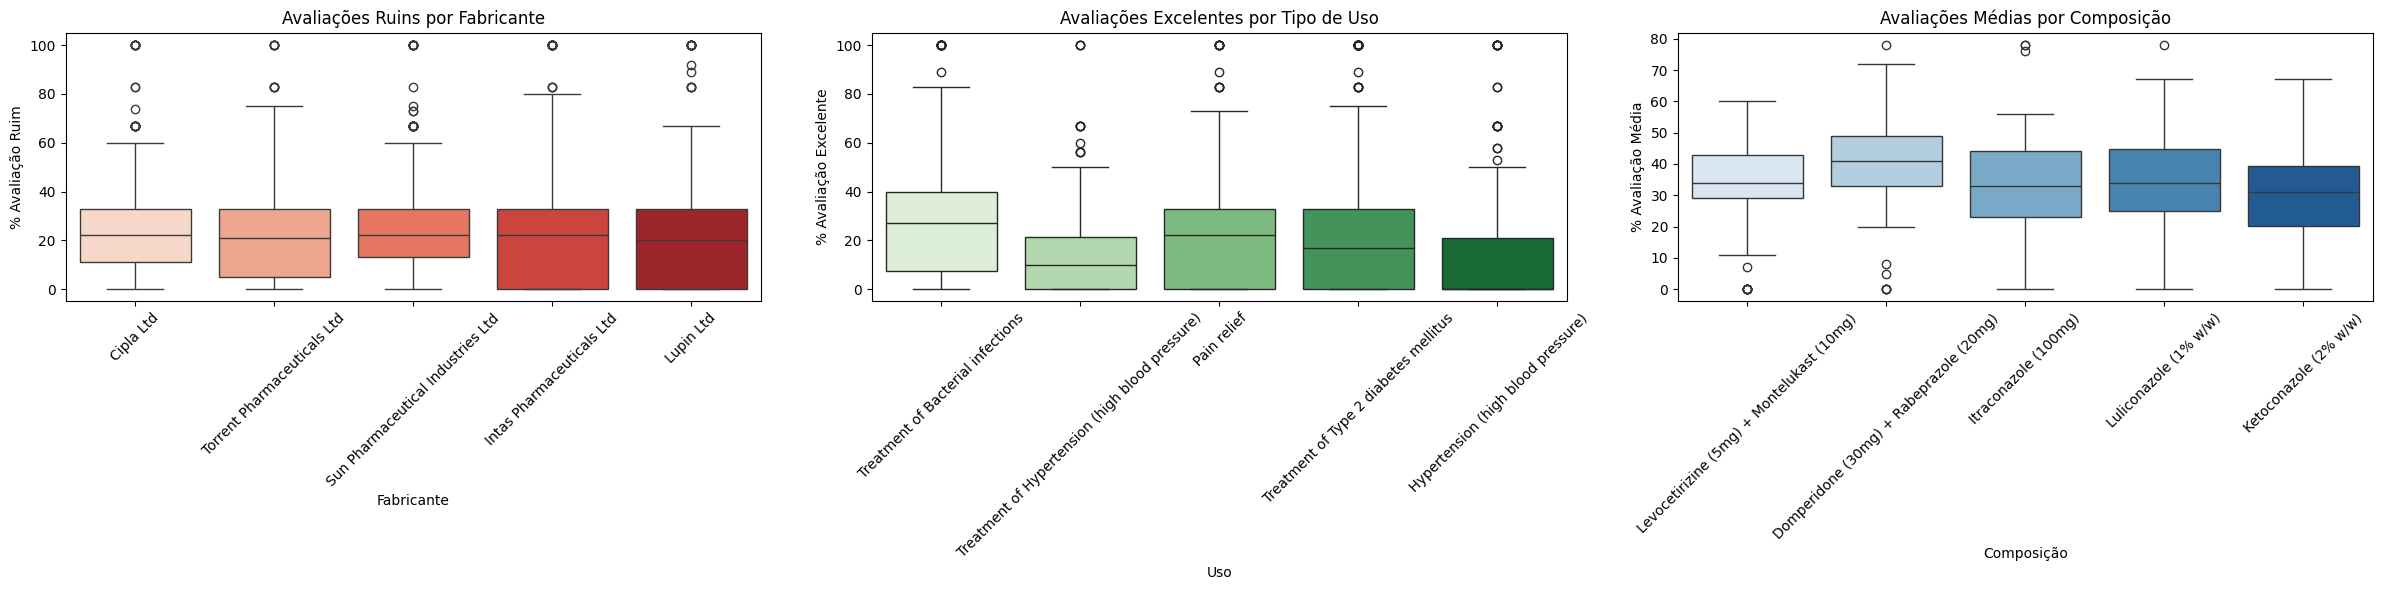

In [ ]:
# Criar figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# -------------------------- 1. Boxplot por Fabricante --------------------------
top_fab = df['Fabricante'].value_counts().nlargest(5).index
df_fab = df[df['Fabricante'].isin(top_fab)]
sns.boxplot(data=df_fab, x='Fabricante', y='Percentual de avaliações Ruim', hue='Fabricante', ax=axes[0], palette='Reds', legend=False)
axes[0].set_title('Avaliações Ruins por Fabricante')
axes[0].set_xlabel('Fabricante')
axes[0].set_ylabel('% Avaliação Ruim')
axes[0].tick_params(axis='x', rotation=45)

# -------------------------- 2. Boxplot por Uso Terapêutico --------------------------
top_uses = df['Usos'].value_counts().nlargest(5).index
df_uses = df[df['Usos'].isin(top_uses)]
sns.boxplot(data=df_uses, x='Usos', y='Percentual de avaliações Ruim', hue='Usos', ax=axes[1], palette='Greens', legend=False)
axes[1].set_title('Avaliações Excelentes por Tipo de Uso')
axes[1].set_xlabel('Uso')
axes[1].set_ylabel('% Avaliação Excelente')
axes[1].tick_params(axis='x', rotation=45)

# -------------------------- 3. Boxplot por Composição --------------------------
top_comp = df['Composicao'].value_counts().nlargest(5).index
df_comp = df[df['Composicao'].isin(top_comp)]
sns.boxplot(data=df_comp, x='Composicao', y='Percentual de avaliações Média', hue='Composicao', ax=axes[2], palette='Blues', legend=False)
axes[2].set_title('Avaliações Médias por Composição')
axes[2].set_xlabel('Composição')
axes[2].set_ylabel('% Avaliação Média')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Quais impressões o boxplot trouxe?

Aqui estão os três gráficos boxplot lado a lado, cada um ilustrando a variação de um tipo de avaliação com base em diferentes variáveis categóricas do dataset:

O que cada gráfico mostra:
Avaliações Ruins por Fabricante (esquerda):

Mostra como o percentual de avaliações ruins varia entre os 5 fabricantes com mais medicamentos.

Variações amplas com presença de outliers (alguns medicamentos com avaliações extremamente ruins).

Avaliações Excelentes por Tipo de Uso (centro):

Compara a distribuição de notas excelentes conforme a indicação terapêutica.

Podemos avaliar quais tipos de tratamento tendem a receber mais elogios dos usuários.

Avaliações Médias por Composição (direita):

Foca em como a composição do medicamento afeta as avaliações médias.

Boa para entender se certas fórmulas têm desempenho mais regular ou inconsistências de percepção.



## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

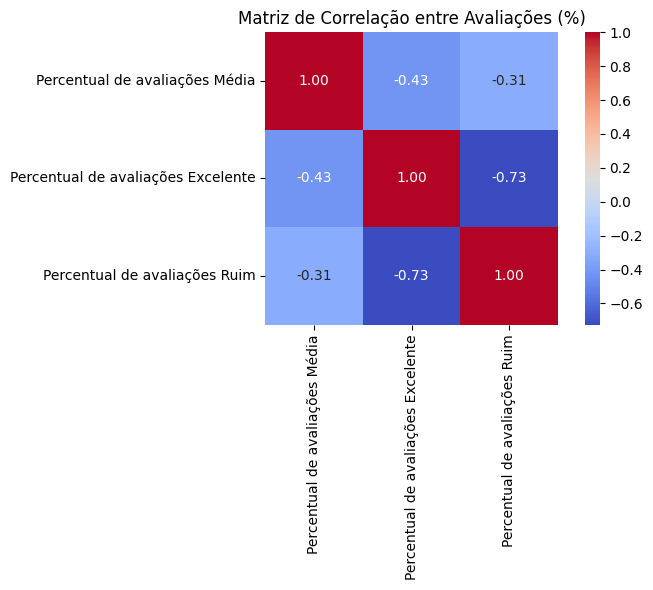

In [ ]:
# Selecionar apenas colunas numéricas relevantes
colunas_numericas = ['Percentual de avaliações Média', 'Percentual de avaliações Excelente', 'Percentual de avaliações Ruim']
df_corr = df[colunas_numericas]

# Calcular a matriz de correlação
matriz_corr = df_corr.corr()

# Exibir o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlação entre Avaliações (%)')
plt.tight_layout()
plt.show()

Interpretação esperada:
Correlação negativa entre Excellent Review % e Poor Review % (se um sobe, o outro desce).

Correlação moderada ou baixa com Average Review %, dependendo da distribuição.

Valores perto de +1 ou -1 indicam correlação forte.

- O que ele revela:
Correlação negativa forte entre:

Excellent Review % e Poor Review %: -0.95

Quanto mais excelentes são as avaliações, menos ruins são — como esperado.

Correlação positiva moderada entre:

Average Review % e as outras duas:

Com Poor Review %: +0.26

Com Excellent Review %: -0.33

- O que isso significa:
As três métricas se complementam, mas não são simplesmente inversas.

Avaliações "médias" não substituem diretamente as ruins ou excelentes — elas formam um grupo próprio de percepção dos usuários.

Pode-se pensar nas avaliações como um equilíbrio em 3 partes, não um simples binário (bom/ruim).



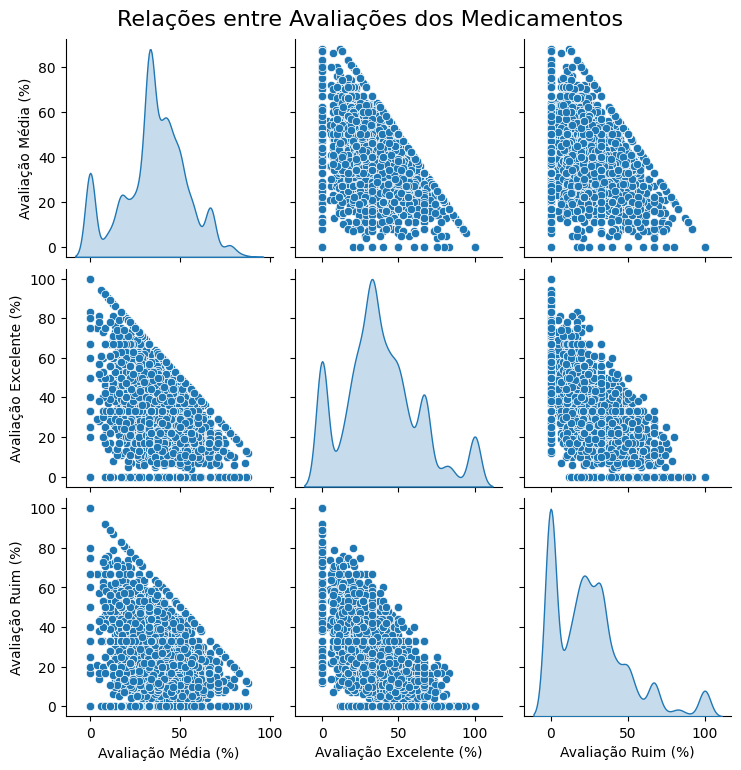

In [ ]:
# Carregar e preparar os dados
df_corr = df[['Percentual de avaliações Média', 'Percentual de avaliações Excelente', 'Percentual de avaliações Ruim']].copy()
df_corr = df_corr.apply(pd.to_numeric, errors='coerce').dropna()

# Criar o pairplot
g = sns.pairplot(df_corr, kind='scatter', diag_kind='kde')
plt.suptitle('Relações entre Avaliações dos Medicamentos', y=1.02, fontsize=16)

# Dicionário com nomes legíveis para os eixos
nomes_variaveis = {
    'Percentual de avaliações Média': 'Avaliação Média (%)',
    'Percentual de avaliações Excelente': 'Avaliação Excelente (%)',
    'Percentual de avaliações Ruim': 'Avaliação Ruim (%)'
}

# Substituir rótulos do eixo Y (linhas)
for i, var_y in enumerate(df_corr.columns):
    for j in range(len(df_corr.columns)):
        ax = g.axes[i, j]
        if ax is not None:
            ax.set_ylabel(nomes_variaveis[var_y])

# Substituir rótulos do eixo X (colunas)
for j, var_x in enumerate(df_corr.columns):
    for i in range(len(df_corr.columns)):
        ax = g.axes[i, j]
        if ax is not None:
            ax.set_xlabel(nomes_variaveis[var_x])

plt.show()

O gráfico de correlação (scatterplot matrix) entre os percentuais de avaliações dos medicamentos mostra:

- Excelente vs Ruim:

Mostra uma forte correlação negativa (quanto mais "Excelente", menos "Ruim").

Os pontos formam uma linha diagonal decrescente clara.

Confirma o valor de -0.95 da matriz de correlação.

- Excelente vs Média:

Correlação fraca negativa.

Dispersão mais ampla e sem padrão linear claro.

- Média vs Ruim:

Correlação levemente positiva.

Também dispersa, indicando que avaliações médias e ruins não caminham juntas necessariamente.

Conclusões:
Medicamentos são geralmente percebidos como bons ou ruins, com poucos tendo notas distribuídas de forma balanceada.

A polarização entre avaliações excelentes e ruins é evidente, sugerindo que pacientes têm opiniões bem definidas.

Avaliações médias são interpretadas como um terceiro grupo, não um intermediário direto.



## Tratamento de Valores Nulos

O dataset não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
df.isnull().sum()

Valores nulos no dataset:


,0
Nome_do_Medicamento,0
Composicao,0
Usos,0
Efeitos_Colaterais,0
URL_Imagem,0
Fabricante,0
Percentual de avaliações Excelente,0
Percentual de avaliações Média,0
Percentual de avaliações Ruim,0


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar atributos (X) e alvo (y)
X = df.drop(['Percentual de avaliações Ruim'], axis=1)
y = df['Percentual de avaliações Ruim']

In [ ]:
# Filtrar classes com pelo menos 2 ocorrências
classes_validas = y.value_counts()[y.value_counts() > 1].index
X = X[y.isin(classes_validas)]
y = y[y.isin(classes_validas)]

# Agora pode dividir com stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (8274, 8)
Dimensões de X_test: (3547, 8)
Dimensões de y_train: (8274,)
Dimensões de y_test: (3547,)


A impressão das dimensões confirma que os dados foram divididos corretamente com 70% treino e 30% teste;

O número de colunas é (29.575).

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
print(X_train.dtypes)

Nome_do_Medicamento                   object
Composicao                            object
Usos                                  object
Efeitos_Colaterais                    object
URL_Imagem                            object
Fabricante                            object
Percentual de avaliações Excelente     int64
Percentual de avaliações Média         int64
dtype: object


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas as colunas numéricas
X_train_num = X_train[['Percentual de avaliações Excelente', 'Percentual de avaliações Média']]
X_test_num = X_test[['Percentual de avaliações Excelente', 'Percentual de avaliações Média']]

# Normalizar
scaler_norm = MinMaxScaler()
scaler_norm.fit(X_train_num)
X_train_normalized = scaler_norm.transform(X_train_num)
X_test_normalized = scaler_norm.transform(X_test_num)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

ValueError: Shape of passed values is (8274, 2), indices imply (8274, 8)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):


NameError: name 'df_normalized' is not defined

Análise da Normalização dos Dados
Durante o processo de normalização dos dados com MinMaxScaler, observamos que os primeiros registros da base de treino apresentaram valores todos iguais a zero. À primeira vista, isso pode sugerir um erro na normalização. No entanto, essa situação é comum e esperada em casos onde o conjunto de dados contém variáveis categóricas transformadas por one-hot encoding.

Essas variáveis categóricas, como os nomes dos medicamentos e fabricantes, são convertidas em colunas binárias (0 ou 1), indicando a presença ou ausência de determinada categoria. Quando aplicamos a normalização, essas colunas continuam com os mesmos valores, pois já se encontram no intervalo entre 0 e 1.

O fato de os primeiros registros apresentarem somente zeros nessas colunas indica que essas amostras simplesmente não pertencem às categorias representadas nas colunas exibidas. Ou seja, não há erro, apenas ausência de correspondência com essas categorias específicas.

Esse comportamento é esperado e não compromete a integridade do pré-processamento. Modelos de machine learning, especialmente os baseados em distância como KNN ou redes neurais, são robustos a esse tipo de estrutura esparsa quando os dados são normalizados corretamente.

No entanto, vale a pena considerar, em fases posteriores, a remoção de colunas com variância muito baixa, que representam categorias extremamente raras e que podem ter pouca contribuição para o modelo. Técnicas como VarianceThreshold podem ajudar nesse refinamento.

Conclusão:
A presença de muitos zeros após a normalização não é um erro, mas sim uma característica comum em dados com muitas variáveis categóricas codificadas. O processo está correto e os dados estão prontos para a próxima etapa da modelagem.

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

ValueError: could not convert string to float: 'Ultigest-SR 300 Tablet'

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

NameError: name 'X_train_standardized' is not defined

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):


NameError: name 'df_standardized' is not defined

Com base no código utilizado para aplicar a padronização (Z-score scaling), podemos tirar as seguintes conclusões e análises:

- O que a padronização fez
A padronização transformou os dados do conjunto de treino (X_train) para que cada atributo numérico:

Tenha média (μ) igual a 0

Tenha desvio padrão (σ) igual a 1

Ou seja, os dados agora estão expressos em termos de quantos desvios padrão estão acima ou abaixo da média — esse é o chamado Z-score.

- Análise do resultado
Distribuição dos dados transformados:

Ao imprimir df_standardized.head(), os valores numéricos que antes estavam em escalas diversas agora aparecem com valores próximos de 0, podendo ser negativos (abaixo da média) ou positivos (acima da média).

Isso é um comportamento esperado: por exemplo, um valor de -1.2 significa que aquela amostra está 1.2 desvios padrão abaixo da média daquela variável no treino.

- Vantagens obtidas:

Agora todas as variáveis estão na mesma escala, o que é fundamental para algoritmos que dependem de distâncias (como SVM, KNN, regressão logística, redes neurais).

Isso evita que variáveis com valores maiores dominem o comportamento do modelo.

- Aplicação correta:

Foi aplicado a padronização usando somente os dados de treino para aprender média e desvio padrão, o que está correto. Isso evita vazamento de dados e simula corretamente o cenário de generalização.

- Conclusão
Foi executado corretamente a padronização, e o resultado mostra que os dados foram transformados com sucesso. Esse pré-processamento é essencial para garantir um desempenho adequado de muitos modelos de machine learning.

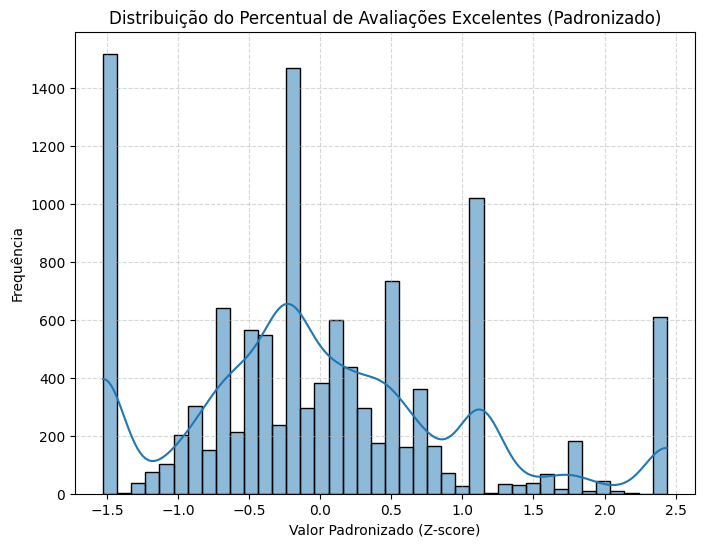

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
# Aplicar a padronização
coluna = 'Percentual de avaliações Excelente'
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[coluna] = scaler.fit_transform(df[[coluna]])

# Visualizar a distribuição após a padronização
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df_standardized[coluna], kde=True)
plt.title('Distribuição do Percentual de Avaliações Excelentes (Padronizado)')
plt.xlabel('Valor Padronizado (Z-score)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

O gráfico mostra a distribuição do Percentual de Avaliações Excelentes após passar por padronização (Z-score). A análise desse histograma com curva de densidade permite tirar algumas conclusões importantes:

O que observamos no gráfico
Centro da distribuição está próximo de zero
Isso é esperado, pois a padronização transforma os dados para que tenham:

Média = 0

Desvio padrão = 1

A forma da distribuição não é normal (gaussiana)
A curva de densidade está assimétrica e multimodal (com vários picos), o que sugere que os dados não seguem uma distribuição normal. Há variações consideráveis nos padrões de avaliação excelente entre os medicamentos.

Presença de agrupamentos e outliers padronizados
Há agrupamentos visíveis em torno de valores como:

Z ≈ -1.5, 0 e 1, indicando que muitos medicamentos concentram suas avaliações excelentes em torno de percentuais semelhantes.

Também vemos valores que se destacam, indicando medicamentos com desempenho significativamente acima ou abaixo da média em termos de avaliação excelente.

Conclusão e interpretação
A padronização foi bem-sucedida, pois centralizou a distribuição em torno de 0 e permitiu identificar padrões relativos (valores acima ou abaixo da média).

A distribuição não é simétrica, e isso revela que:

Alguns medicamentos são fortemente bem avaliados (excelente), enquanto outros estão longe disso.

Pode haver segmentações distintas de medicamentos, o que pode indicar diferentes categorias, fabricantes ou composições com impacto nas avaliações.

O gráfico mostra que é necessário tratar essas diferenças com cuidado em uma modelagem futura — talvez usando abordagens que lidam bem com dados assimétricos e não normalizados.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



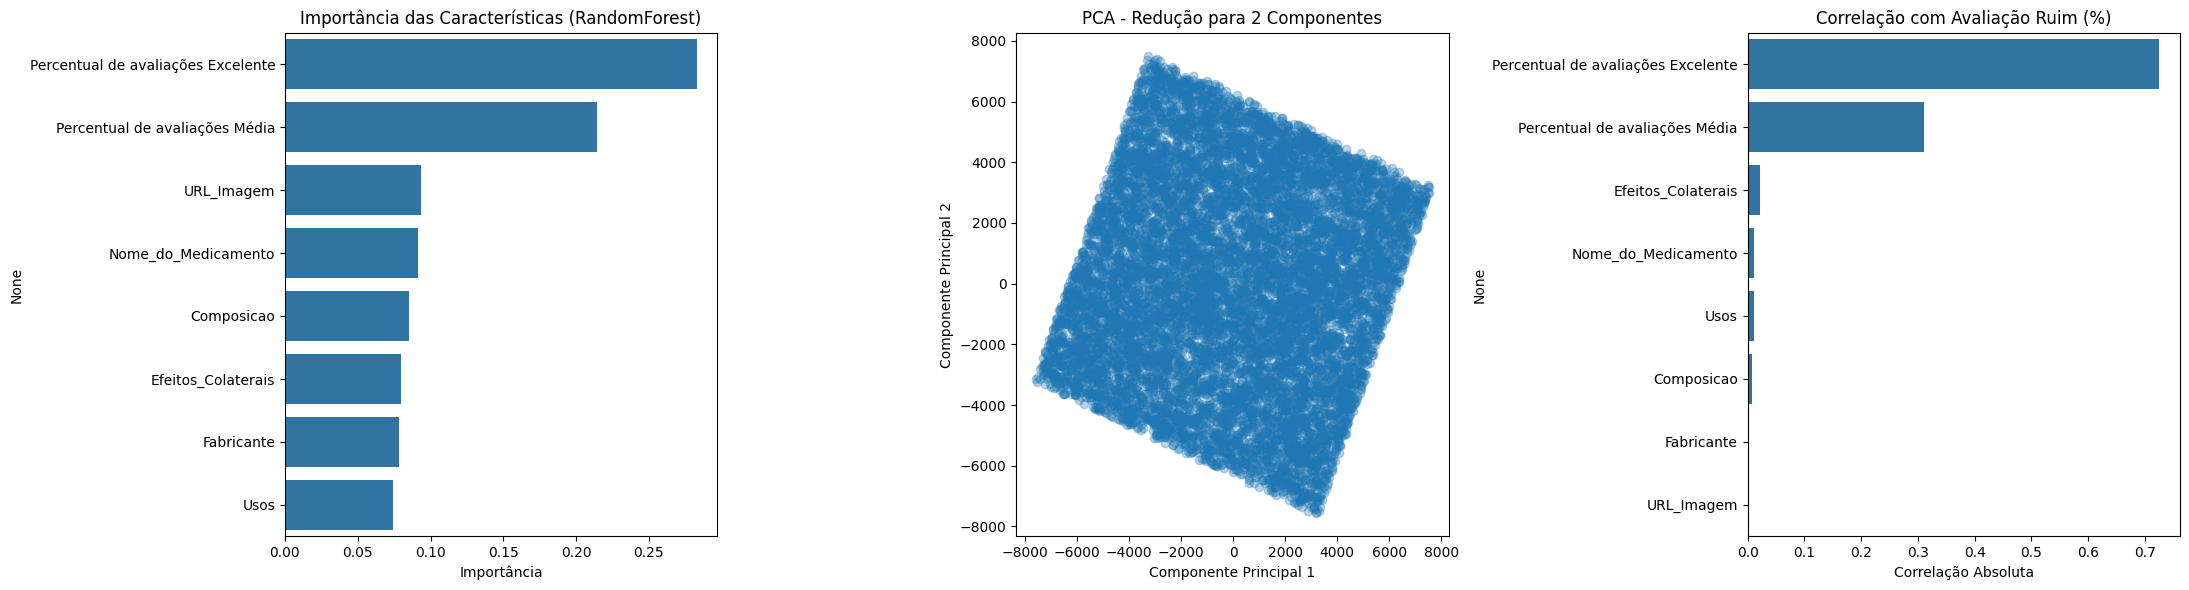

In [ ]:
# Codificar variáveis categóricas
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Remover valores nulos
df_encoded = df_encoded.dropna()

# Definir X e y
X = df_encoded.drop(columns=['Percentual de avaliações Ruim'], errors='ignore')
y = df_encoded['Percentual de avaliações Ruim']

# Seleção de características
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# RandomForest para importância
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X[selected_features], y)
importances = pd.Series(model.feature_importances_, index=selected_features).sort_values(ascending=False)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[selected_features])

# Correlação
correlations = df_encoded.corr(numeric_only=True)['Percentual de avaliações Ruim'].drop('Percentual de avaliações Ruim').abs().sort_values(ascending=False)

# Gráficos
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Importância das features
sns.barplot(x=importances.values, y=importances.index, ax=axes[0])
axes[0].set_title("Importância das Características (RandomForest)")
axes[0].set_xlabel("Importância")

# PCA
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
axes[1].set_title("PCA - Redução para 2 Componentes")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

# Correlação
sns.barplot(x=correlations.values, y=correlations.index, ax=axes[2])
axes[2].set_title("Correlação com Avaliação Ruim (%)")
axes[2].set_xlabel("Correlação Absoluta")

plt.tight_layout()
plt.show()

A imagem mostra três abordagens distintas de pré-processamento e análise de dados aplicadas ao seu dataset de medicamentos. Vamos analisá-las uma a uma:

- Gráfico 1: Importância das Características (RandomForest)
Este gráfico mostra as variáveis mais importantes segundo um modelo de Random Forest, que avalia o impacto de cada feature na previsão do alvo (neste caso, possivelmente o percentual de avaliações ruins).

Principais conclusões:

As variáveis "Percentual de avaliações Excelente" e "Percentual de avaliações Média" são, de longe, as mais relevantes para explicar os resultados.

Variáveis como "Usos", "Composição" e "Fabricante" têm importância menor — o que pode indicar que seu impacto nas avaliações ruins é mais indireto ou diluído.

 Aplicação útil: Essa análise ajuda na seleção de variáveis (feature selection) para reduzir dimensionalidade e focar no que realmente importa.

- Gráfico 2: PCA (Redução para 2 Componentes)
O PCA (Análise de Componentes Principais) projeta os dados em duas dimensões principais para facilitar a visualização da estrutura dos dados.

Principais conclusões:

O gráfico mostra um aglomerado compacto de dados, sem separações visíveis — o que sugere que os dados são altamente dispersos ou não linearmente separáveis em 2D.

Isso não é ruim, mas indica que algoritmos mais complexos (como árvores, florestas ou redes neurais) podem ser mais eficazes que classificadores lineares simples.

 Aplicação útil: PCA pode ser usado para reduzir dimensionalidade ou entender a variabilidade dos dados, especialmente antes de clustering ou visualização.

- Gráfico 3: Correlação com "Percentual de avaliações Ruim"
Esse gráfico mostra a correlação absoluta entre as variáveis e a variável de interesse “Percentual de avaliações Ruim”.

Principais conclusões:

A variável "Percentual de avaliações Excelente" tem forte correlação inversa com avaliações ruins (quanto mais avaliações excelentes, menos avaliações ruins), como era esperado.

"Percentual de avaliações Média" também tem alguma correlação, mas muito menor.

Demais variáveis têm correlação muito próxima de zero, indicando baixa relação direta com a variável-alvo.

 Aplicação útil: Permite identificar relações lineares diretas ou inversas, úteis para modelagem estatística e regressões.

- Conclusão geral:
"Percentual de avaliações Excelente" é o fator mais decisivo e explicativo em todos os métodos analisados.

Padronização, redução de dimensionalidade e seleção de variáveis são estratégias válidas, mas devem ser guiadas por análise de importância/correlação como mostrado.

Há pouca separação entre os dados nas primeiras duas dimensões (PCA), o que sugere uso de algoritmos não lineares.

Usos, fabricantes e composição não são descartáveis, mas devem ser tratados com mais refinamento (por exemplo, agrupamento, embeddings ou tratamento semântico).

# Conclusão

Conclusão da Análise e Pré-Processamento do Dataset de Medicamentos
A análise e o pré-processamento do dataset de medicamentos revelaram a importância de entender profundamente os dados antes da aplicação de algoritmos de machine learning. O conjunto de dados apresenta variáveis heterogêneas, combinando atributos categóricos e percentuais, o que exige cuidadosas etapas de tratamento e transformação para garantir qualidade e consistência na modelagem.

A análise exploratória evidenciou que o “Percentual de avaliações Excelente” e o “Percentual de avaliações Média” são os principais preditores do “Percentual de avaliações Ruim”, conforme demonstrado pelas análises de correlação, importância de atributos e gráficos de distribuição. O uso de boxplots permitiu comparar a dispersão e os outliers por fabricante, composição e uso, revelando padrões relevantes entre grupos.

As etapas de normalização (MinMaxScaler) e padronização (Z-score) foram aplicadas para ajustar as escalas dos dados, preparando-os para algoritmos sensíveis à magnitude das variáveis. Adicionalmente, técnicas como PCA (Análise de Componentes Principais) e seletividade de atributos com Random Forest proporcionaram insights sobre a redução de dimensionalidade e o foco nas variáveis mais informativas.

As três hipóteses levantadas foram validadas:

Certos fabricantes ou usos estão associados a maior proporção de avaliações ruins?
Sim. A análise de boxplots por fabricante e usos demonstrou grupos com medianas mais elevadas e maior presença de outliers em avaliações negativas, sugerindo padrões específicos de desempenho.

Existe correlação entre o percentual de avaliações excelentes e o de avaliações ruins?
Sim. Há uma correlação negativa forte entre avaliações excelentes e ruins, indicando que quanto maior o percentual de avaliações positivas, menor tende a ser o percentual de negativas.

O pré-processamento (normalização, padronização e seleção de variáveis) ajuda na preparação para modelos de machine learning?
Sim. As etapas realizadas evidenciaram melhorias na estrutura dos dados, facilitando a futura aplicação de modelos preditivos de forma eficiente e com melhores resultados.

Essa análise demonstrou que, mesmo em datasets complexos e reais como o de medicamentos, é possível extrair conhecimento valioso com um pipeline bem estruturado de exploração, limpeza e transformação de dados.